# Practical 16


### Create a compare analysis of IRIS Dataset by plotting two different Decision Tree using Entropy and Gini Index ASM.

In [1]:
# sample/observations stand for number of rows
# variables/features/data/dataspace stands for number of columns

# "load_iris" returns you two things 
# 1) data - all the independent features
# 2) target - class column or the last column

In [2]:
# Iris Datasets
# Iris is a family of flower containing three type of flower called setosa, verginica, versicolor
# Problem Statement: The problem is that, we have given some features of a flower, 
# features we have to identify which flower belongs to which category.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn import tree

from sklearn.datasets import load_iris # loading iris dataset from sklearn library datasets

In [4]:
# we loaded our datasets that is iris flower datasets.
# We can download iris datasets directly using sklearn load_iris()

import sklearn.datasets as data

iris_data = load_iris()
dataset = pd.DataFrame(iris_data.data)

print("Features Name : ", iris_data.feature_names) #print all the column names 
print("Target Name : ", iris_data.target_names) # print the values in the target column 

# Printing the dataset shape
print("Dataset Length : ", len(dataset)) 
print("Dataset Shape : ", dataset.shape)

# Shape: 150 samples (rows) and 4 features (columns.)
#Printing the dataset observations

dataset.head()

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Name :  ['setosa' 'versicolor' 'virginica']
Dataset Length :  150
Dataset Shape :  (150, 4)


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_data.target #it prints the array of the target column or the last column 
#setosa = 0, versicolor = 1 and verginica = 2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
print(dataset)

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
..   ...  ...  ...  ...
145  6.7  3.0  5.2  2.3
146  6.3  2.5  5.0  1.9
147  6.5  3.0  5.2  2.0
148  6.2  3.4  5.4  2.3
149  5.9  3.0  5.1  1.8

[150 rows x 4 columns]


In [7]:
X = dataset.values[:, 0:4]
Y = iris_data.target

# Splitting the dataset into trian and test

# Split the datasets into two part Testing (test_size = 30%) and Training data (70%)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3 , random_state = 1)

In [8]:
print('Independent Variable : ','\n',X[0:5])
print('Dependent Variable : ','\n',Y[0:5])

Independent Variable :  
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Dependent Variable :  
 [0 0 0 0 0]


In [9]:
# Here we defined the decisioin tree classifieer (Basically building a model).
# And then fit the training data into the classifier to train the model.
# Note that we fit both x_train, and y_train (Basically features and target)
# means model will learn features values to predict the category of flower.

clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 1, max_depth = 5)

#performancec training

clf_entropy.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

In [10]:
y_pred2 = clf_entropy.predict(x_test)
print("Predicted values : ")
print(y_pred2)

Predicted values : 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [11]:
print("Confusion Matrix : \n", confusion_matrix(y_test, y_pred2))

print("Accuracy : ", accuracy_score(y_test,y_pred2)*100, "%")

print("Report : \n ", classification_report(y_test, y_pred2))

# In Confusion Matrix 
# values in the diagonal are correct values i.e. True Positive like (14,17,12)
# values other than diagonal are incorrect values i.e. True Negative or False Positive like (1 in 2nd & 3rd row)

Confusion Matrix : 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]
Accuracy :  95.55555555555556 %
Report : 
                precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [12]:
# Prediction on random data using clf_entropy

# We put random values (4 feature values ) and make prediction.
# We get the category 2 means the flower that we have belongs to Verginica(category)

Xrandom = [[6.4, 1.8, 6.6, 2.1]]

y_pred4 = clf_entropy.predict(Xrandom)

print(y_pred4)

# Here [2] refers to the virginica 

[2]


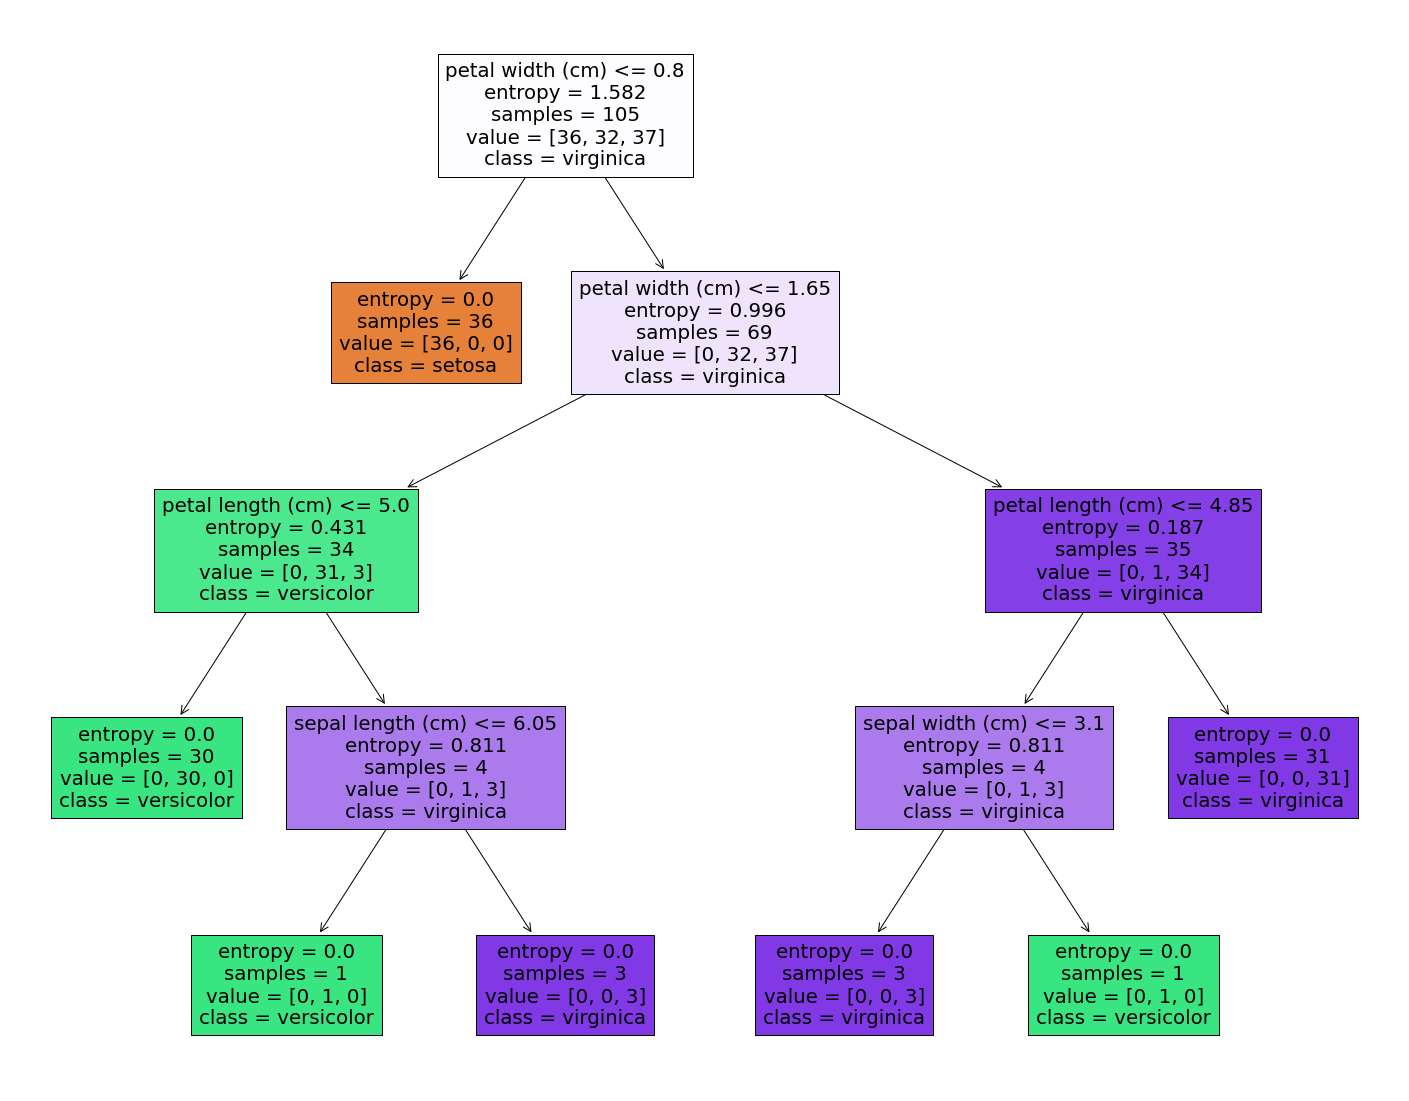

In [13]:
# Plotting the branches on the Decision Tree
fig = plt.figure(figsize = (25,20))
a = tree.plot_tree(clf_entropy, feature_names = iris_data.feature_names, class_names = iris_data.target_names, filled = True)

#### Bagging

In [14]:
# Overfitting - More than 98%
# Overfitting can be solved using ensemble technique called bagging


In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 5)

# fitting the model
tree = tree.fit(x_train, y_train)

# A Bagging classifier is an ensemble meta-estimator that fits base classifier each on random subsets
# of the original dataset and then aggregate their individual predictions
# (either by coting or by averaging) to form a final prediction.

# Parameters:
#1. base_estimator object, default = None
#    The base estimator to it on random subsets of the dataset. If None, then the base estimator 
# is a DecisionTreeClassifier.

# 2. n_estimators int, default = 10
# The number of base estimators in the ensemble.

bag = BaggingClassifier(base_estimator = tree, n_estimators = 500, random_state = 5)
bag = bag.fit(x_train, y_train)

# Predicting the training set
y_train_pred = bag.predict(x_train)

# Predicting the test set
y_test_pred = bag.predict(x_test)

In [16]:
bag_test = round(accuracy_score(y_test, y_test_pred),2) * 100
print(bag_test, '%')

96.0 %


#### Using Gini Index

In [17]:
#ASM -----> Gini Index
#here we defined decision tree classifier
#note that x_train, y_train is fit
#max_depth== maximum level, hit and trial
clf_gini=DecisionTreeClassifier(criterion="gini", random_state=1, max_depth=5)
#Performing training so no need of transformation
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

In [18]:
# Predicting using predict()
y_pred3=clf_gini.predict(x_test)
print('Predicted Values: ')
print(y_pred3)

Predicted Values: 
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]


In [19]:
# Confusion matrix
print('Confusion Matrix: \n',confusion_matrix(y_test,y_pred3))
#for row it is True Negative and for columns it is False Positive

Confusion Matrix: 
 [[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


In [20]:
# Accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(y_test,y_pred3)*100,"%")
print('\n')

# Classification Report
from sklearn.metrics import classification_report
print('Report : \n', classification_report(y_test,y_pred3))

Accuracy :  95.55555555555556 %


Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [21]:
# Prediction on the new random value
# Prediction on random data using clf_entropy
# We will input random values(4 feature values) and make prediction
# The output is [2] means verginica
xrandom=[[6.4,1.8,6.6,2.1]]
y_pred4=clf_gini.predict(xrandom)
print(y_pred4)

[2]


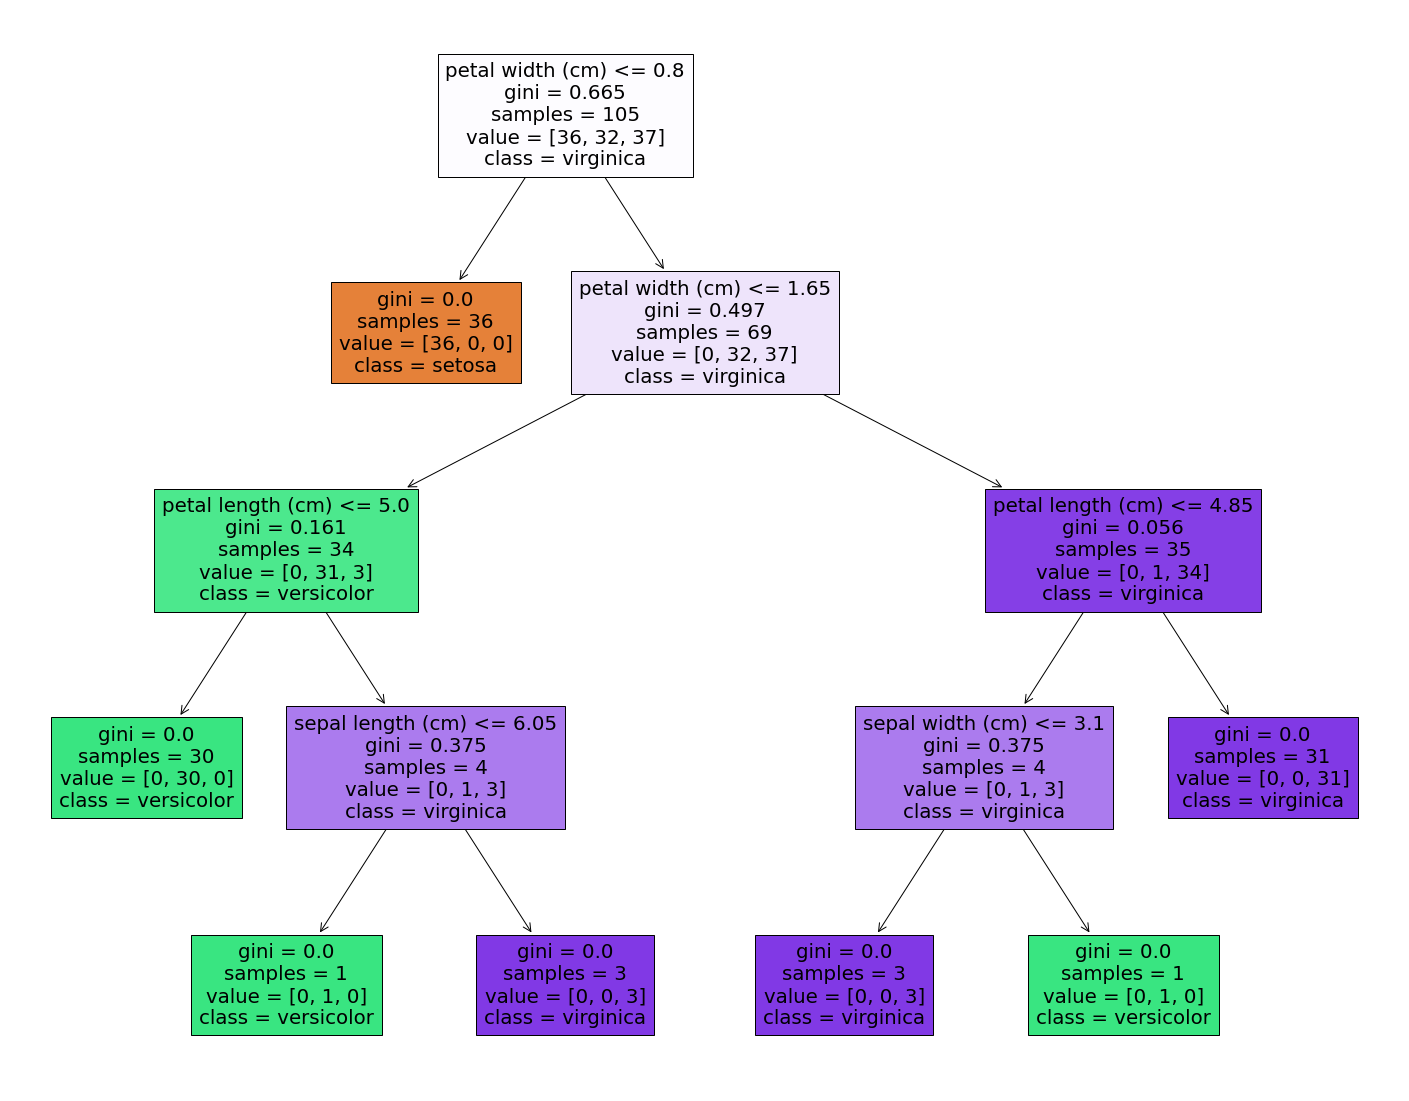

In [23]:
# Plotting the Branches of the Decision Tree
# this data is for training
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
fig=plt.figure(figsize=(25,20))
a=tree.plot_tree(clf_gini, feature_names=iris_data.feature_names,class_names=iris_data.target_names,filled=True)

In [24]:
# Bagging
# Overfitting, Underfitting is solved by using Bagging important it will come
tree=DecisionTreeClassifier(random_state=5)
#Fitting the model
tree=tree.fit(x_train,y_train)
bag=BaggingClassifier(base_estimator=tree,n_estimators=500,random_state=5)
bag=bag.fit(x_train,y_train)
y_train_pred=bag.predict(x_train)
y_test_pred=bag.predict(x_test)

In [25]:
bag_test=round(accuracy_score(y_test,y_test_pred),2)*100
print(bag_test)

96.0
